# Morphological Analysis of 3D Models

This notebook demonstrates the process of morphological analysis based on 3D model. This is done in the following two steps.
1. Analysis of basic morphological characteristics such as volume and surface area of 3D models；
2. Cell density and cell distribution analysis.

### Packages

In [16]:
import os
import spateo as st
import numpy as np

### Data source

Take CNS as an example.

In [17]:
tissue = "CNS"
pc_file = f"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction/E8-10_b_all_anno_scsq/2_reconstruct_tissues/mesh/{tissue} primordium_trim_pc_model.vtk"
volume_file = f"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction/E8-10_b_all_anno_scsq/2_reconstruct_tissues/mesh/{tissue} primordium_volume_model.vtk"

tissue_pc = st.tl.read_mesh(pc_file)
tissue_volume = st.tl.read_mesh(volume_file)

########################################################################################################################
save_folder = r"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction"
save_cellbin_tdr_folder = os.path.join(save_folder, r"E8-10_b_all_anno_scsq")
save_cellbin_tdr_3_folder = os.path.join(save_cellbin_tdr_folder, r"3_morphology_3Dmodels")
save_cellbin_tdr_mesh_folder = os.path.join(save_cellbin_tdr_3_folder, r"mesh")
save_cellbin_tdr_image_folder = os.path.join(save_cellbin_tdr_3_folder, r"image")
if not os.path.exists(save_folder):
    os.mkdir(save_folder)
if not os.path.exists(save_cellbin_tdr_folder):
    os.mkdir(save_cellbin_tdr_folder)
if not os.path.exists(save_cellbin_tdr_3_folder):
    os.mkdir(save_cellbin_tdr_3_folder)
if not os.path.exists(save_cellbin_tdr_mesh_folder):
    os.mkdir(save_cellbin_tdr_mesh_folder)
if not os.path.exists(save_cellbin_tdr_image_folder):
    os.mkdir(save_cellbin_tdr_image_folder)

### Analysis of basic morphological characteristics such as volume and surface area of 3D models

|-----> Length (x) of mesh: 1.74109;
|-----> Width (y) of mesh: 1.13171;
|-----> Height (z) of mesh: 0.62389;
|-----> Surface area of mesh: 4.50374;
|-----> Volume of mesh: 0.15989;
|-----> Volume / surface area ratio of mesh: 0.0355.
|-----> Cell density of mesh: 13421.72744.


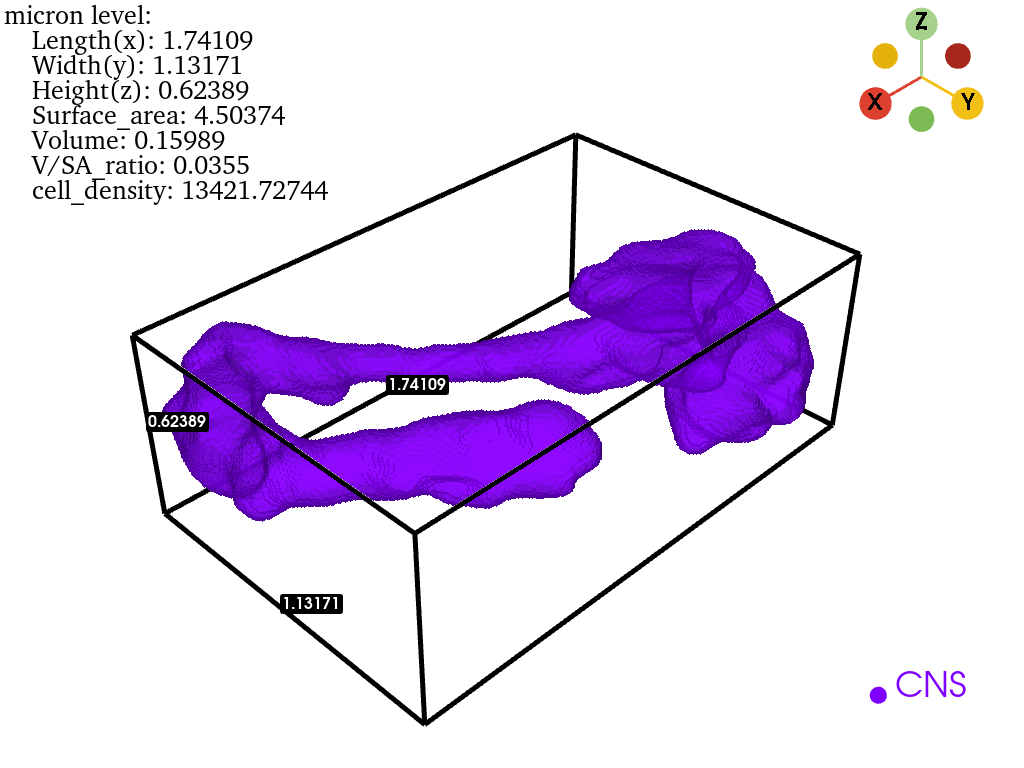

In [18]:
def visualization(mesh, morphology_info, jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white")
    st.pl.add_mesh(plotter=p, mesh=mesh, key="groups")
    st.pl.add_outline(plotter=p, mesh=mesh, outline_width=5, outline_color="black", labels=True, labels_color="white", labels_size=16)
    st.pl.add_legend(plotter=p, mesh=mesh, key="groups")
    morphology_text = "micron level:\n"
    for key, value in morphology_info.items():
        morphology_text += f"    {key}: {str(value)}\n"
    p.add_text(morphology_text, font_size=12, color="black", font="times", position='upper_left')
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)

micron_tissue_pc = tissue_pc.copy()
micron_tissue_volume = tissue_volume.copy()

micron_tissue_pc.points = micron_tissue_pc.points * 2 /1000
micron_tissue_volume.points = micron_tissue_volume.points * 2 /1000

micron_tissue_volume["groups"] = np.asarray([tissue] * micron_tissue_volume.n_cells)
morphology_info = st.tl.mesh_morphology(mesh=micron_tissue_volume, pcd=micron_tissue_pc)
visualization(mesh=micron_tissue_volume, morphology_info=morphology_info, jupyter=True, save_image=None)
visualization(mesh=micron_tissue_volume, morphology_info=morphology_info, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{tissue}_morphology.tiff"))

### Cell density and cell distribution analysis

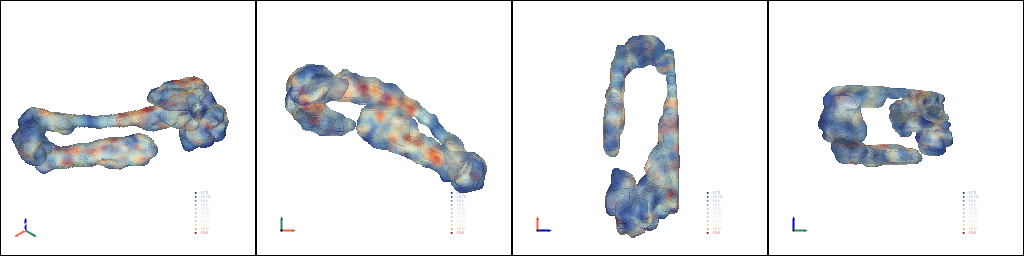

In [19]:
# Visualization
def visualization(mesh, jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, cpo in enumerate(["iso", "xy", "zx", "yz"]):
        p.subplot(0, i)
        st.pl.add_mesh(plotter=p, mesh=mesh, key="pc_kde")
        st.pl.add_legend(plotter=p, mesh=mesh, key="pc_kde")
        p.add_axes()
        p.camera_position = cpo
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)
def visualization_slicing(sliceing_models, jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, model in enumerate(sliceing_models):
        p.subplot(0, i)
        st.pl.add_mesh(plotter=p, mesh=model, key="pc_kde")
        st.pl.add_legend(plotter=p, mesh=model, key="pc_kde")
        p.add_axes()
        p.camera_position = "iso"
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)


st.tl.pc_KDE(pc=tissue_pc, bandwidth=10, key_added="pc_kde", colormap="RdYlBu_r", alphamap=.9)

source_pc = tissue_pc.copy()
del source_pc.point_data["obs_index"], source_pc.point_data["groups"]
interpolate_volume = st.tl.interpolate_mesh(mesh=tissue_volume, source=source_pc, N=5, where="point_data")

visualization(mesh=interpolate_volume, jupyter=True)
visualization(mesh=interpolate_volume, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{tissue}_volume_kde.tiff"))

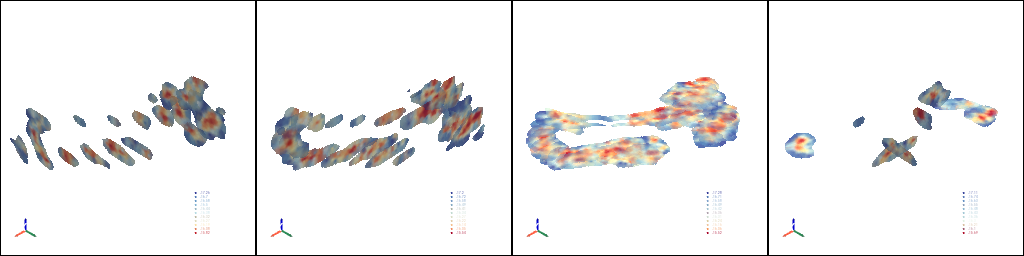

In [20]:
# slicing
slices_models = [
    st.tl.three_d_slice(mesh=interpolate_volume, axis="x", n_slices=10, method="axis"),
    st.tl.three_d_slice(mesh=interpolate_volume, axis="y", n_slices=10, method="axis"),
    st.tl.three_d_slice(mesh=interpolate_volume, axis="z", n_slices=10, method="axis"),
    st.tl.three_d_slice(mesh=interpolate_volume, method="orthogonal"),
]
visualization_slicing(sliceing_models=slices_models, jupyter=True)
visualization_slicing(sliceing_models=slices_models, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{tissue}_slicing_kde.tiff"))